# Project 1: SAT & ACT Analysis


## Problem Statement

The College Board, best known as the company that creates and hosts the Scholastic Aptitude Test (SAT), is currently facing increased competetitions from American College Testing (ACT). The ACT has more recently implemented itself as a comparable standardized test for college admissions, and has formed contracts with different state governments to serve as a substitute for mandated state testing for Junior and Senior high school students. However, with new reformatting of the SAT, the College Board has been working to show that the SAT is still a relevant and top level standardized test to prepare high school students for higher education.

I am part of a team tasked to analyze the National SAT and ACT data from 2017 and 2018, organized by state average participation and scores for each test. I will be presenting my findings to College Board staff, a non-technical audience, to provide my recommendations for how best direct marketing and stragy funding to boost SAT participation and scores in states with lower participation rates.



## Executive Summary


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [801]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [802]:
act_2017 = pd.read_csv('/Users/cambostein/dsi2018/projects/project-1/data/act_2017.csv', delimiter=',')
sat_2017 = pd.read_csv('/Users/cambostein/dsi2018/projects/project-1/data/sat_2017.csv', delimiter=',')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [803]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [804]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 3. Verbally Describe Data

#### Answer: 

**ACT Data:** The ACT data consists of several metrics organized by state and national average. These include averages for each section (English, Math, Reading, and Science), and the average composite score. The data also contain percent participation of eligible high school students, per state and nationally.

**Sat Data:** The SAT data includes participation per state, average state scores for the two sections (Reading and Writing; Math), and average Total Sat score.

#### 4a. Does the data look complete? 

#### Answer: 

There are no missing values in either of the DataFrames.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### Answer: 

**ACT:** The minimum value for percent participation would be 0. The maximum value is 100.
For individual subject scores and the composite score, the range is 1 to 36.

**SAT:** The range for percent participation again is 0-100. For the individual section scores, the range is 200-800, which add to the total score being between 400 and 1600.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [805]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [806]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### 5. What are your data types? 
Display the data types of each feature. 

In [807]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [808]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

### Answer:

The percent participation values are strings - It would be wise to convert them to integers by removing the '%' character.

The value for Composite

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [809]:
def remove_percent_symbol(dataframe):
    dataframe['Participation'] = dataframe['Participation'].apply(lambda x: float(x.replace('%',''))/100)
    return dataframe

In [810]:
sat_2017 = remove_percent_symbol(sat_2017)

In [811]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [812]:
act_2017 = remove_percent_symbol(act_2017)

In [813]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [814]:
act_2017.loc[[51], ['Composite']] = 20.2
act_2017.loc[[51], ['Composite']]

,Composite
51,20.2


**Fixing other misreported Data:**

ACT 2017 Science, Maryland

SAT 2017 Math, Maryland

In [815]:
#another method to change the value of a cell. This method is "bulkier" in that it would replace any value = 23.
#The method in the next cell is more targetted.
#act_2017.replace(to_replace= 2.3, value = 23, inplace=True)


In [816]:
act_2017.loc[[21], ['Science']] = 23.0
act_2017.loc[[21], ['Science']]

,Science
21,23.0


In [817]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,0.29,23.5,23.3,24.6,23.5,23.8
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5
51,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2


**Changing misrepored value for mean SAT Math Score, 2017, Maryland**

In [818]:
sat_2017.loc[[20], ['Math']] = 524
sat_2017.loc[[20]]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,0.69,536,524,1060


- Finish your data modifications by making sure the columns are now typed appropriately.

In [819]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [820]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [821]:
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [822]:
#Code:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [823]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [824]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [825]:
#code

new_sat_columns = ['state', 'sat_participation_17', 'sat_ebrw_17', 'sat_math_17', 'sat_total_17']
sat_2017.columns = new_sat_columns
sat_2017.columns

Index(['state', 'sat_participation_17', 'sat_ebrw_17', 'sat_math_17',
       'sat_total_17'],
      dtype='object')

In [826]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [827]:
new_act_columns = ['state', 'act_participation_17', 'act_english_17', 'act_math_17', 
                   'act_reading_17', 'act_science_17', 'act_composite_17']
act_2017.columns = new_act_columns
act_2017.columns

Index(['state', 'act_participation_17', 'act_english_17', 'act_math_17',
       'act_reading_17', 'act_science_17', 'act_composite_17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
| State | object | ACT/SAT | List of States and Territories |	
| act_participation | float | ACT | Participation per State |
| act_english | float | ACT | Average score for the English section, from 1-36  |
| act_math | float | ACT | Average score for the Math section, from 1-36 |
| act_reading | float | ACT | Average score for the Reading section, from 1-36 |
| act_science | float | ACT | Average score for the Science section, from 1-36 |	
| act_composite | float | ACT | Average Composite score, from 1-36 |
| sat_participation | float | SAT | Participation per State |
| sat_ebrw | int | SAT | Average score for the Evidence-based Reading and Writing section, from 200-800 |
| sat_math | int | SAT | Average score for the Math section, from 200-800 |
| sat_total | int | SAT | Average total score, from 400-1600 |


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [828]:
act_2017.head()
#row 0 populated with National Data

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [829]:
sat_2017.head()
#does not contain national data

,state,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [830]:
act_2017 = act_2017.drop([0])
act_2017.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [831]:
#Code:
combined_2017 = act_2017.merge(sat_2017, how = 'inner', on='state')

In [1011]:
#Checking that I still have all the proper rows and formatting
combined_2017.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [833]:
#Checking that I still have all the proper rows and formatting
combined_2017.tail()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17
46,Virginia,0.29,23.5,23.3,24.6,23.5,23.8,0.65,561,541,1102
47,Washington,0.29,20.9,21.9,22.1,22.0,21.9,0.64,541,534,1075
48,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4,0.14,558,528,1086
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291
50,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,0.03,626,604,1230


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [834]:
#saving the cleaned 2017 data to csv
combined_2017.to_csv('/Users/cambostein/dsi2018/projects/project-1/data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [835]:
#importing SAT and ACT csv files
sat_2018 = pd.read_csv('/Users/cambostein/dsi2018/projects/project-1/data/East_Coast_Data_Entry - SAT 2018.csv')
act_2018 = pd.read_csv('/Users/cambostein/dsi2018/projects/project-1/data/East_Coast_Data_Entry - ACT 2018.csv')

In [836]:
#checking out the column names, looking for datatypes and missing values
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State                                 52 non-null object
Participation                         52 non-null object
Evidence-Based Reading and Writing    52 non-null int64
Math                                  52 non-null int64
Total                                 52 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [837]:
#bringing back this function to call on act_2018 df and remove percent symbols, convert to float
def remove_percent_symbol(dataframe):
    dataframe['Participation'] = dataframe['Participation'].apply(lambda x: float(x.replace('%',''))/100)
    return dataframe

In [838]:
#using above function and checking that the datatype has changed for the 'Participation' column
remove_percent_symbol(sat_2018)
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State                                 52 non-null object
Participation                         52 non-null float64
Evidence-Based Reading and Writing    52 non-null int64
Math                                  52 non-null int64
Total                                 52 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [839]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1168
4,California,0.60,540,536,1076


In [840]:
#checking out the column names, looking for datatypes and missing values
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [841]:
#bringing back this function to call on act_2018 df
def remove_percent_symbol(dataframe):
    dataframe['Participation'] = dataframe['Participation'].apply(lambda x: float(x.replace('%',''))/100)
    return dataframe

In [842]:
#using above function and checking that the datatype has changed for the 'Participation' column
remove_percent_symbol(act_2018)
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null float64
Composite        52 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [843]:
#checking out basic dataframe structure, looking for values that need to be corrected
act_2018.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [844]:
#changing name of 'Washington D.C.'' to 'District of Columbia'
act_2018.loc[[8], ['State']] = 'District of Columbia'
act_2018.loc[[8], ['State']]

,State
8,District of Columbia


In [845]:
#changing column names for SAT 2018 data
sat_2018_columns = ['state', 'sat_participation_18', 'sat_ebrw_18', 'sat_math_18', 'sat_total_18' ]

sat_2018.columns = sat_2018_columns
sat_2018.columns

Index(['state', 'sat_participation_18', 'sat_ebrw_18', 'sat_math_18',
       'sat_total_18'],
      dtype='object')

In [846]:
#changing column names for ACT 2018 data
act_2018_columns = ['state', 'act_participation_18', 'act_composite_18']
act_2018.columns = act_2018_columns
act_2018.columns

Index(['state', 'act_participation_18', 'act_composite_18'], dtype='object')

In [847]:
act_2018.head()

,state,act_participation_18,act_composite_18
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [848]:
#merging 2018 data into one dataframe
combined_2018 = act_2018.merge(sat_2018, how="left", on='state')
combined_2018.head()

,state,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1168
4,California,0.27,22.7,0.60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [849]:
combined = combined_2017.merge(combined_2018, how="left", on='state')
combined.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1168
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


In [850]:
#Creating finalized CSV file
combined.to_csv('/Users/cambostein/dsi2018/projects/project-1/data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [851]:
combined.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
act_participation_17,51.0,0.652549,0.321408,0.08,0.31,0.69,1.00,1.0
act_english_17,51.0,20.931373,2.353677,16.30,19.00,20.70,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.00,19.40,20.90,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.10,20.45,21.80,24.15,26.0
act_science_17,51.0,21.447059,1.735552,18.20,19.95,21.30,23.10,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [852]:
#code
def std_dev(some_list):
    mean_sum = 0
    for num in some_list: 
        mean_sum += num
    mean_list = mean_sum/len(some_list)
    
    var_sum = 0
    for num in some_list: 
        var_sum += ((num - mean_list) ** 2)
    std_list = (var_sum * (1/len(some_list))) ** (1/2)
    
    return std_list

In [853]:
#testing std_dev() function on a specified column.
std_dev(combined['act_math_17'])

1.9624620273436781

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [854]:
#different methods for calling a specific column title from combined dataframe

combined.columns[1]
# std_dev(combined.iloc[:,1]);
# combined.shape[1];

'act_participation_17'

In [855]:
#Dictionary of variables and their associated means calculated with custom std_dev() function
sd_dict = {combined.columns[k]: std_dev(combined.iloc[:,k]) for k in range(1, combined.shape[1])}
sd_dict

{'act_participation_17': 0.3182417575123181,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7184526716715494,
 'act_composite_17': 2.000786081581989,
 'sat_participation_17': 0.3492907076664507,
 'sat_ebrw_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participation_18': 0.33701735820410317,
 'act_composite_18': 2.090779082141178,
 'sat_participation_18': 0.36933213828978173,
 'sat_ebrw_18': 44.864630427956726,
 'sat_math_18': 48.97751133618255,
 'sat_total_18': 93.51362961350053}

In [856]:
#Dictionary of variables and their associated means calculated with np.std()
np_sd_dict = {combined.columns[k]: np.std(combined.iloc[:,k]) for k in range(1, combined.shape[1])}
np_sd_dict

{'act_participation_17': 0.3182417575123181,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7184526716715494,
 'act_composite_17': 2.000786081581989,
 'sat_participation_17': 0.3492907076664507,
 'sat_ebrw_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participation_18': 0.33701735820410317,
 'act_composite_18': 2.090779082141178,
 'sat_participation_18': 0.36933213828978173,
 'sat_ebrw_18': 44.864630427956726,
 'sat_math_18': 48.97751133618255,
 'sat_total_18': 93.51362961350053}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**
No, they are slightly different than the values used from pandas `.describe()`. I would attribut this to the fact that `.describe()` function uses built in functions to calculate values like mean, variance, standard deviation, etc. When all of these operation are done with functions, you will start to accumulate some amount of rounding errors. It is identical to the `np.std()`, which makes me happy because I built a function that is identically productive to a numpy function, and therefore I am immensely proud!

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [857]:
#Creating a mask to show only States with ACT or SAT Participation above 90%
mask = (combined['act_participation_17'] > 0.9) | (combined['act_participation_18'] > 0.9) | (combined['sat_participation_18'] > 0.9) | (combined['sat_participation_18'] > 0.9)
combined[mask][['act_participation_17', 'act_participation_18', 
                'sat_participation_17', 'sat_participation_18']].sort_values('act_participation_17', ascending=False).head()

,act_participation_17,act_participation_18,sat_participation_17,sat_participation_18
0,1.0,1.00,0.05,0.06
23,1.0,0.99,0.03,0.04
49,1.0,1.00,0.03,0.03
44,1.0,1.00,0.03,0.04
42,1.0,1.00,0.05,0.06


**2017 SAT Participation**: Leaders and Stragglers

_Leaders:_ Connecticut, Michigan, Delaware, District of Columbia, New Hampshire

_Stragglers:_ Mississippi, Iowa, North Dakota, Utah, South Dakota (plus 13 more states below 10% Participation)


In [860]:
mask = combined['sat_participation_17'] < 0.10
#combined[['state', 'sat_participation_17', 'sat_total_17']].sort_values('sat_participation_17')
combined[mask][['state', 'sat_participation_17', 'sat_total_17']].sort_values('sat_total_17').head()

,state,sat_participation_17,sat_total_17
36,Oklahoma,0.07,1047
13,Illinois,0.09,1115
0,Alabama,0.05,1165
18,Louisiana,0.04,1198
3,Arkansas,0.03,1208


**2018 SAT Participation**: Leaders and Stragglers

_Leaders:_ Idaho, Michigan, Deleware, Connecticut, Illinois

_Stragglers:_ North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin (still, 13 more under 10% participation)

In [861]:
mask = combined['sat_participation_18'] <= 0.10
#combined[['state', 'sat_participation_18', 'sat_total_18']].sort_values('sat_participation_18')
combined[mask][['state', 'sat_participation_18', 'sat_total_18']].sort_values('sat_total_18').head()

,state,sat_participation_18,sat_total_18
36,Oklahoma,0.08,1062
0,Alabama,0.06,1166
3,Arkansas,0.05,1168
26,Montana,0.10,1198
18,Louisiana,0.04,1210


**Below**: Displaying the states with lowest ACT participation and their associated SAT Total score averages

In [64]:
#combined[['state','act_participation_17', 'act_composite_17', 'sat_total_17']].sort_values('act_participation_17')
#combined.iloc[:,:2].sort_values('act_participation_17')

In [862]:
mask = combined['act_participation_17'] < 0.3
combined[mask][['state', 'act_participation_17', 'act_composite_17', 
                'sat_participation_17', 'sat_total_17']].sort_values('act_participation_17')

,state,act_participation_17,act_composite_17,sat_participation_17,sat_total_17
19,Maine,0.08,24.3,0.95,1012
7,Delaware,0.18,24.1,1.00,996
29,New Hampshire,0.18,25.5,0.96,1052
39,Rhode Island,0.21,24.0,0.71,1062
38,Pennsylvania,0.23,23.7,0.65,1071
20,Maryland,0.28,23.6,0.69,1060
21,Massachusetts,0.29,25.4,0.76,1107
22,Michigan,0.29,24.1,1.00,1005
45,Vermont,0.29,23.6,0.60,1114
46,Virginia,0.29,23.8,0.65,1102


**2017 ACT Participation**: Leaders and Stragglers

_Leaders:_ Alabama, Kentucky, Wisconsin, Utah, Tennessee (and 12 other states with 100% Participation)

_Stragglers:_ Maine (0.08), New Hampshire (0.18), Delaware (0.18), Rhode Island (0.21), Pennsylvania (0.23)

In [863]:
combined[['state', 'act_participation_17']
        ].sort_values('act_participation_17', ascending=True).head()

,state,act_participation_17
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


**2018 ACT Participation**: Leaders and Stragglers

_Leaders:_ Alabama, Kentucky, Wisconsin, Utah, Tennessee (and 12 more states with 100% participation)

_Stragglers:_ Maine (0.07), Rhode Island (0.15), New Hampshire (0.16), Delaware (0.17), Pennsylvania (0.20)

In [864]:
combined[['state', 'act_participation_18']].sort_values('act_participation_18', ascending=True).head()

,state,act_participation_18
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


**2017 ACT Composite Score Leaders and Stragglers**

_Leaders:_ New Hampshire (25.5), Massachusetts (25.4), Connecticut (25.2), Maine (24.3), Districut of Columbia (24.2)

_Stragglers:_ Nevada (17.8), Mississippi (18.6), South Carolina (18.7), Hawaii (19.0), North Carolina (19.1)

In [865]:
combined[['state', 'act_composite_17']].sort_values('act_composite_17', ascending=True).head()

,state,act_composite_17
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


**2018 ACT Composite Score Leaders and Stragglers**

_Leaders:_ Connecticut (25.6), Massachusetts (25.2), New Hampshire (25.1), New York (24.5), Michigan (24.2)

_Stragglers:_ Nevada (17.7), South Carolina (18.3), Mississippi (18.6), Hawaii (18.9), Alabama (19.1)

In [866]:
combined[['state', 'act_composite_18']].sort_values('act_composite_18', ascending=True).head()

,state,act_composite_18
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


**2017 SAT Composite Score Leaders and Stragglers**

_Leaders:_ Minnesota (1295), Wisconsin (1291), Iowa (1275), Missouri (1271), Kansas (1260)

_Stragglers:_ District of Columbia (950), Delaware (996), Idaho (1005), Michigan (1005), Maine (1012)

In [867]:
combined[['state', 'sat_total_17']].sort_values('sat_total_17', ascending=False).head()

,state,sat_total_17
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


**2018 SAT Composite Score Leaders and Stragglers**

_Leaders:_ Minnesota (1298), Wisconsin (1294), North Dakota (1283), Missouri (1272), Iowa (1265)

_Stragglers:_ District of Columbia (977), Delaware (997), West Virginia (999), Idaho (1001), Michigan (1010)

In [868]:
combined[['state', 'sat_total_18']].sort_values('sat_total_18', ascending=False).head()

,state,sat_total_18
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
25,Missouri,1272
15,Iowa,1265


**Personal EDA**


- Compare states 2017 act-sat 
- Compare states 2018 act-sat 
- compare states act 2017-2018  
- compare states sat 2017-2018 
- states with low SAT scores 
- states with low ACT scores



In [869]:
#Showing dataframe with participation rates for both tests, both years
#Code commented out to sort for all the different columns.

combined[['state', 'act_participation_17', 'act_participation_18', 
          'sat_participation_17', 'sat_participation_18' ]
        ].sort_values("act_participation_17", ascending=False).head()

#combined[['state', 'act_participation_17', 'act_participation_18', 
          #'sat_participation_17', 'sat_participation_18' ]].sort_values("act_participation_18", ascending=False)

#combined[['state', 'act_participation_17', 'act_participation_18', 
          #'sat_participation_17', 'sat_participation_18' ]].sort_values("sat_participation_17")

#combined[['state', 'act_participation_17', 'act_participation_18', 
          #'sat_participation_17', 'sat_participation_18' ]].sort_values("sat_participation_18")

,state,act_participation_17,act_participation_18,sat_participation_17,sat_participation_18
0,Alabama,1.0,1.0,0.05,0.06
17,Kentucky,1.0,1.0,0.04,0.04
49,Wisconsin,1.0,1.0,0.03,0.03
44,Utah,1.0,1.0,0.03,0.04
42,Tennessee,1.0,1.0,0.05,0.06


In [870]:
combined['act_17to18_difference'] = combined['act_participation_18'] - combined['act_participation_17']

**Created a new column to show the difference between ACT participation rates between 2017 and 2018.**

_Notable states:_ Colorado, Illinois, Alaska

In [871]:
combined[['state', 'act_17to18_difference']].sort_values('act_17to18_difference').head()

,state,act_17to18_difference
5,Colorado,-0.70
13,Illinois,-0.50
1,Alaska,-0.32
22,Michigan,-0.07
9,Florida,-0.07


**Created a new column to show the difference between SAT participation rates between 2017 and 2018.**

_Notable states:_ Illinois, Rhode Island, Colorado, West Virginia, Florida

In [872]:
combined['sat_17to18_difference'] = combined['sat_participation_18'] - combined['sat_participation_17']

In [873]:
combined[['state', 'sat_17to18_difference']].sort_values('sat_17to18_difference', ascending=False).head()

,state,sat_17to18_difference
13,Illinois,0.90
39,Rhode Island,0.26
5,Colorado,0.17
48,West Virginia,0.14
9,Florida,0.14


**States with ACT Contracts**

These are typically states that require ACT for state testing and have very high if not 100% participation rates. 
These States are important for the College Board to know about so we can avoid going after testing while those states are still under contract with the SAT. However, it will be vital to keep track of Contract stipulations and try to partner with those state governments once the ACT contracts expire.

In [996]:
#creating mask to look at states that have 100% ACT participation rates in 2017-2018
mask = (combined['act_participation_17'] == 1.0)

In [997]:
ACT_Contracted_States_2017 = list(combined[mask]['state'].values)

In [998]:
#Created a list that will be shraed with the College Board administrators. 
ACT_Contracted_States_2017

['Alabama',
 'Arkansas',
 'Colorado',
 'Kentucky',
 'Louisiana',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nevada',
 'North Carolina',
 'Oklahoma',
 'South Carolina',
 'Tennessee',
 'Utah',
 'Wisconsin',
 'Wyoming']

In [999]:
mask = (combined['act_participation_18'] > 0.9)
act_contracted_states_2018 = list(combined[mask]['state'].values)
act_contracted_states_2018

['Alabama',
 'Arkansas',
 'Kentucky',
 'Louisiana',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'South Carolina',
 'Tennessee',
 'Utah',
 'Wisconsin',
 'Wyoming']

In [1006]:
combined[mask][['state', 'act_participation_18']].head()

,state,act_participation_18
0,Alabama,1.00
3,Arkansas,1.00
17,Kentucky,1.00
18,Louisiana,1.00
23,Minnesota,0.99


In [965]:
#States with SAT Contracts
#New Contracts: Florida, Illinois, New Jersey, Rhode Island
mask = (combined['sat_participation_17'] > 0.8) | (combined['sat_participation_18'] > 0.8)
combined[mask][['state', 'sat_participation_17', 'sat_total_17','sat_participation_18', 'sat_total_18']]

,state,sat_participation_17,sat_total_17,sat_participation_18,sat_total_18
6,Connecticut,1.00,1041,1.00,1054
7,Delaware,1.00,996,1.00,997
8,District of Columbia,1.00,950,0.92,977
9,Florida,0.83,1017,0.97,1015
12,Idaho,0.93,1005,1.00,1001
13,Illinois,0.09,1115,0.99,1019
19,Maine,0.95,1012,0.99,1013
22,Michigan,1.00,1005,1.00,1010
29,New Hampshire,0.96,1052,0.96,1073
30,New Jersey,0.70,1056,0.82,1094


### Pennsylvania Data

In [1020]:
mask = combined['state'] == 'Pennsylvania'

combined[mask].T.head()

,38
state,Pennsylvania
act_participation_17,0.23
act_english_17,23.4
act_math_17,23.4
act_reading_17,24.2


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

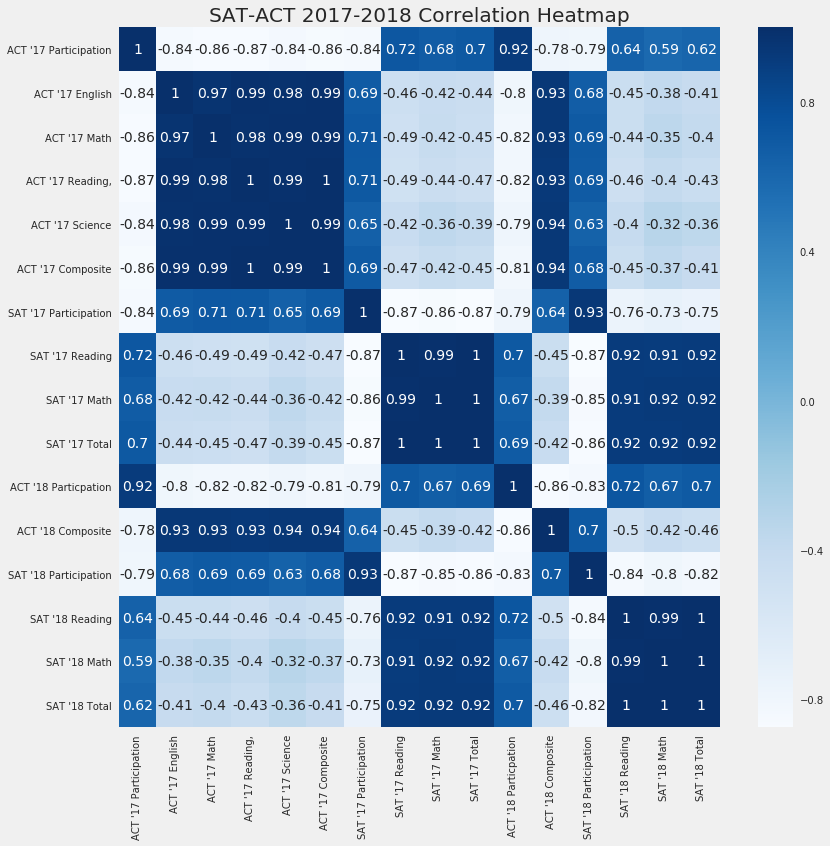

In [973]:
ticks_list = ['ACT \'17 Participation', 'ACT \'17 English', 'ACT \'17 Math', 'ACT \'17 Reading,', 'ACT \'17 Science',
              'ACT \'17 Composite', 'SAT \'17 Participation', 'SAT \'17 Reading', 'SAT \'17 Math', 'SAT \'17 Total',
              'ACT \'18 Particpation', 'ACT \'18 Composite', 'SAT \'18 Participation', 'SAT \'18 Reading',
              'SAT \'18 Math', 'SAT \'18 Total']

plt.subplots(figsize = (12, 12))
plt.title("SAT-ACT 2017-2018 Correlation Heatmap")
correlations = combined[combined.columns[:-4]].corr()

#mask = np.zeros_like(correlations, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
#add mask=mask as a parameter to sns.heatmap to remove redundant top right half of the matrix. 

ax = sns.heatmap(correlations, cmap='Blues', annot=True)
ax.set_xticklabels(ticks_list)
ax.set_yticklabels(ticks_list);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [985]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):

    nrows=int(np.ceil((len(list_of_columns))/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize= (12, 2.5 * len(list_of_columns))) # You'll want to specify your figsize
    plt.style.use('bmh')
    plt.tight_layout(pad=3)       #this better spaces the subplots so titles and xlabels do not overlap
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        if ("act" in column) and ("17" in column):   #created conditionals to plot specific color and alpha
            color="maroon"                         #based on test type and year
            alpha=0.9
        elif ("act" in column) and ("18" in column):
            color="maroon"
            alpha=0.75
        elif ("sat" in column) and ("17" in column):
            color='blue'
            alpha=0.9
        elif ("sat" in column) and ("18" in column):
            color = "blue"
            alpha=0.75
        else:
            color='black'
                    
        ax[i].hist(dataframe[column], color=color, alpha=alpha) 
        ax[i].set_title(list_of_titles[i])
        #avline adds a dotted line at the mean for each distribution
        ax[i].axvline(dataframe[column].mean(), color='red', linewidth=2)
        ax[i].axvline(dataframe[column].median(), color='black', linewidth=2, linestyle='-')
        #ax[i].set_text()
        ax[i].set_ylabel('Frequency')
        ax[i].set_xlabel(list_of_xlabels[i])
        

        #ax[i].set_xticks()
        # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

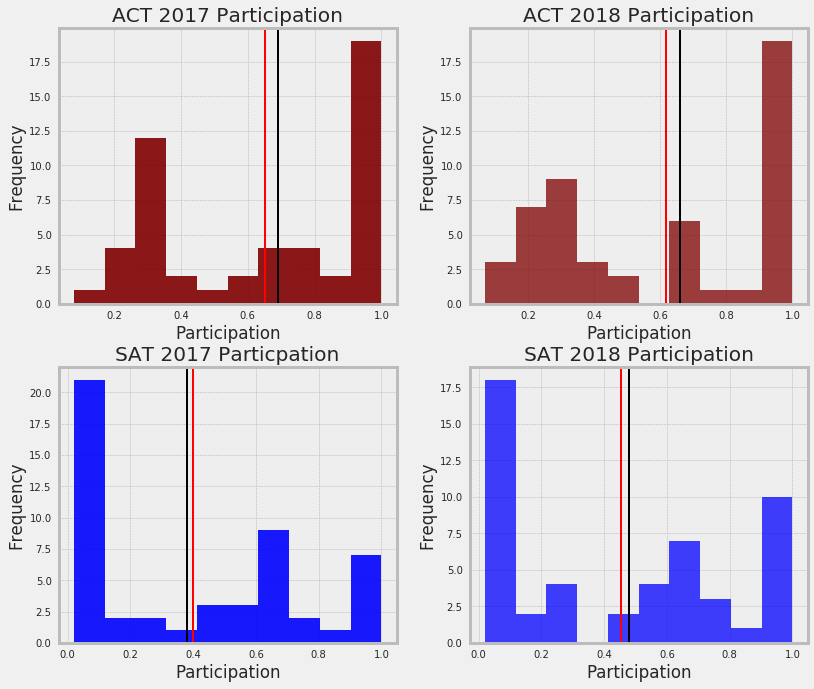

In [986]:
#plotting 2017-2018 ACT and SAT Participation Rates
#notably lower participation for the SAT

participation_cols = ['act_participation_17', 'act_participation_18', 
                      'sat_participation_17', 'sat_participation_18']

titles = ['ACT 2017 Participation', 'ACT 2018 Participation',
          'SAT 2017 Particpation', 'SAT 2018 Participation']

xlabels = ["Participation", "Participation", "Participation", "Participation"]

subplot_histograms(combined[participation_cols], participation_cols, titles, xlabels)
                    
    


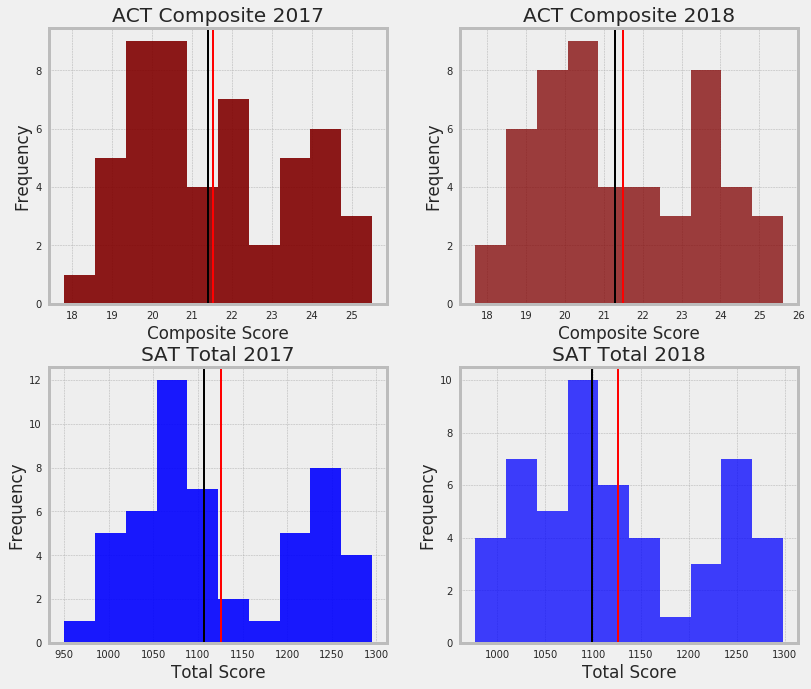

In [987]:
#plotting distributions for total test scores

total_cols = ['act_composite_17', 'act_composite_18', 'sat_total_17', 'sat_total_18']

total_titles = ["ACT Composite 2017", "ACT Composite 2018", "SAT Total 2017", "SAT Total 2018"]

total_xlabels = ["Composite Score", "Composite Score", "Total Score", "Total Score"]

subplot_histograms(combined[total_cols], total_cols, total_titles, total_xlabels)

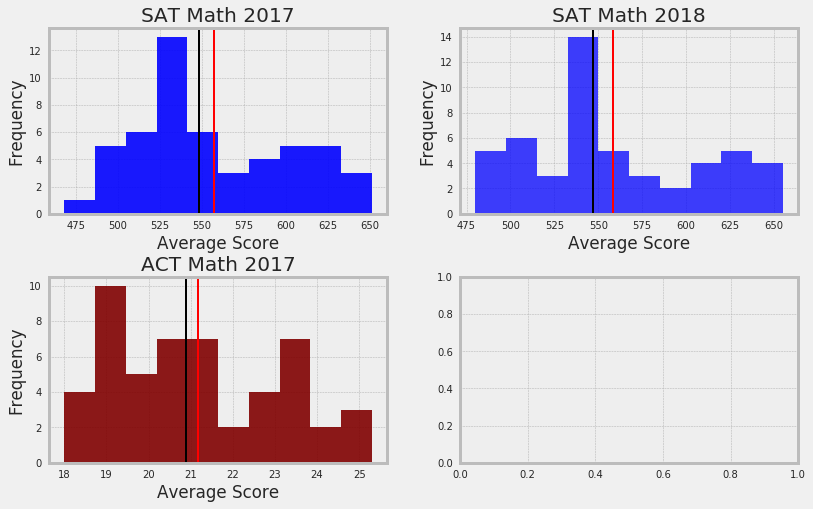

In [988]:
#plotting Math scores for SAT and ACT - 2018 ACT Math is not available


math_cols = ['sat_math_17', 'sat_math_18', 'act_math_17']

math_titles = ["SAT Math 2017", "SAT Math 2018", "ACT Math 2017"]

math_xlabels = ["Average Score",  "Average Score", "Average Score"]

subplot_histograms(combined[math_cols], math_cols, math_titles, math_xlabels)

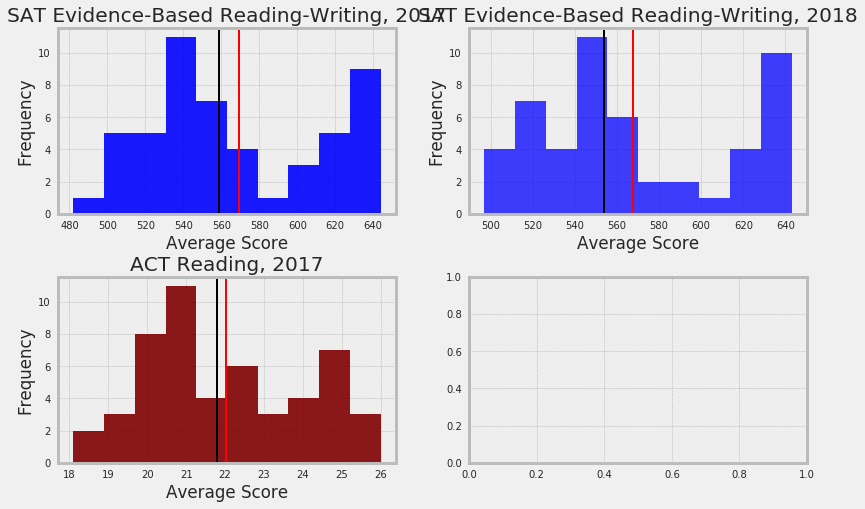

In [989]:
#distributions for SAT and ACT Reading Scores (2018 ACT not available)

language_titles = ["SAT Evidence-Based Reading-Writing, 2017", "SAT Evidence-Based Reading-Writing, 2018",
                   'ACT Reading, 2017']

language_xlabel = ["Average Score", "Average Score", "Average Score"]

language_cols = ['sat_ebrw_17', 'sat_ebrw_18', 'act_reading_17' ]

subplot_histograms(combined[language_cols], language_cols, language_titles, language_xlabel )

Mean appears to be higher for multiple SAT tests compared to the SAT - students excel more at the SAT as it is a better test - therefore, it could arguably be a better option for students seeking higher education.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [922]:
def data_scatterplot(variable1, variable2, title, xlabel='ACT', ylabel='SAT'):
    plt.style.use('seaborn')
    plt.title(title)
    plt.scatter(variable1, variable2, c='b')
    ax = sns.scatterplot(variable1, variable2)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.legend().set_visible(False)

### 2017 ACT vs SAT Math Scores

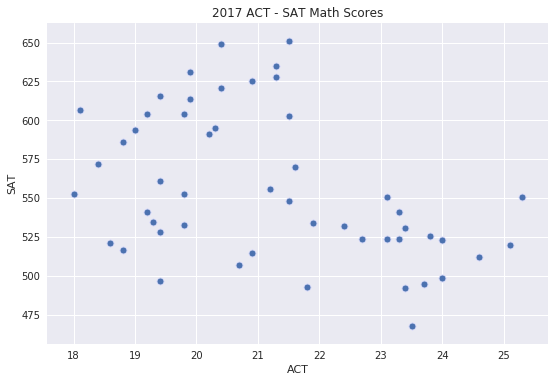

In [1018]:
data_scatterplot(combined['act_math_17'], combined['sat_math_17'], 
                 "2017 ACT - SAT Math Scores");

### 2017 ACT vs SAT Reading and Verbal Scores

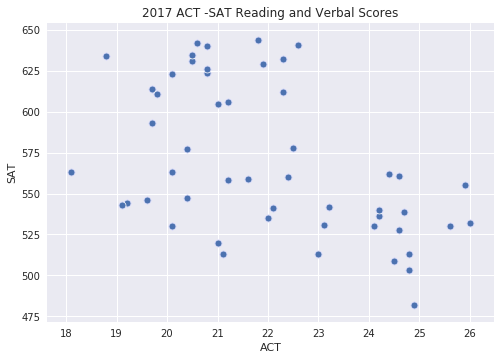

In [924]:
data_scatterplot(combined['act_reading_17'], combined['sat_ebrw_17'], 
                 '2017 ACT -SAT Reading and Verbal Scores', 'ACT', 'SAT');

### 2017 ACT vs SAT Composite and Total Scores

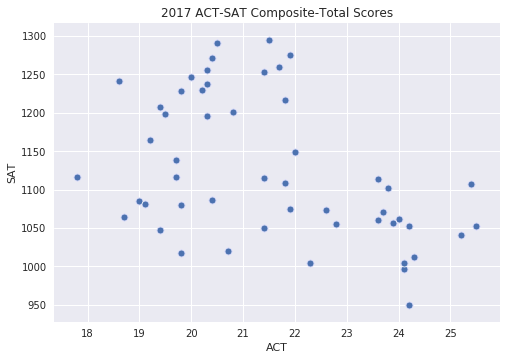

In [925]:
data_scatterplot(combined['act_composite_17'], combined['sat_total_17'], 
                 "2017 ACT-SAT Composite-Total Scores", 'ACT', 'SAT');

### Exploring the data for ACT testing between 2017-2018

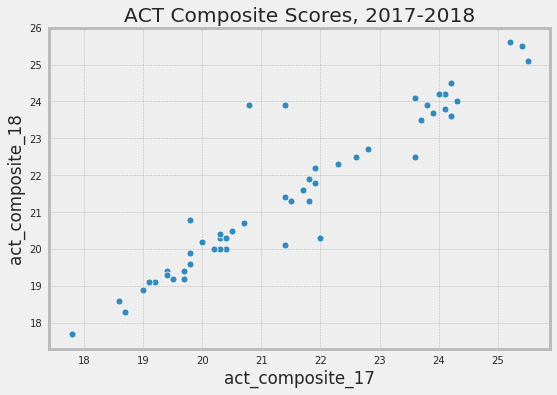

In [983]:
plt.title("ACT Composite Scores, 2017-2018")
ax.set_xlabel("2017")
ax.set_ylabel("2018")
ax = sns.scatterplot(combined['act_composite_17'], combined['act_composite_18']);

**The two outliers on the above graph are Colorado and Illinois. Both states so big increases in SAT participation, so ACT
score averages increased.**

In [977]:
#creating a new column to see the differences in scores from 2017-2018.
combined['composite_difference'] = combined['act_composite_18'] - combined['act_composite_17']
combined[['state', 'act_composite_17', 'act_composite_18', 
          'composite_difference']].sort_values('composite_difference', ascending=False).head()

,state,act_composite_17,act_composite_18,composite_difference
5,Colorado,20.8,23.9,3.1
13,Illinois,21.4,23.9,2.5
1,Alaska,19.8,20.8,1.0
45,Vermont,23.6,24.1,0.5
6,Connecticut,25.2,25.6,0.4


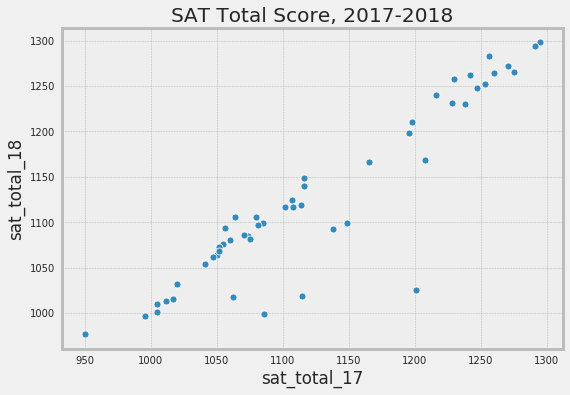

In [984]:
#showing the clear and strong positive correlation between SAT scores year to year.
plt.title("SAT Total Score, 2017-2018")
sns.scatterplot(combined['sat_total_17'], combined['sat_total_18']);

**This plot again shows the outliers from the above Scatterplot. Colorado is obvious outlier - it experienced a big dip in test scores when the SAT participation rate increased.**


In [929]:
#Created a new column to show differences in total SAT scores from 2017-2018, organized by greatest score reduction.
combined['sat_total_differences'] = combined['sat_total_18'] - combined['sat_total_17']
combined[['state', 'sat_total_17', 'sat_total_18', 
          'sat_total_differences']].sort_values('sat_total_differences').head()

,state,sat_total_17,sat_total_18,sat_total_differences
5,Colorado,1201,1025,-176
13,Illinois,1115,1019,-96
48,West Virginia,1086,999,-87
35,Ohio,1149,1099,-50
31,New Mexico,1138,1092,-46


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [930]:
combined.columns

Index(['state', 'act_participation_17', 'act_english_17', 'act_math_17',
       'act_reading_17', 'act_science_17', 'act_composite_17',
       'sat_participation_17', 'sat_ebrw_17', 'sat_math_17', 'sat_total_17',
       'act_participation_18', 'act_composite_18', 'sat_participation_18',
       'sat_ebrw_18', 'sat_math_18', 'sat_total_18', 'act_17to18_difference',
       'sat_17to18_difference', 'composite_difference',
       'sat_total_differences'],
      dtype='object')

### Box Plot for ACT Composite and Section Scores

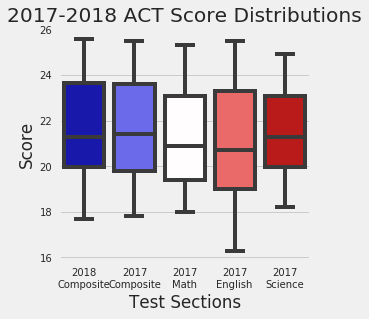

In [952]:
labels = ['2018\nComposite', '2017\nComposite', '2017\nMath', '2017\nEnglish', '2017\nScience']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(4,4))
plt.title("2017-2018 ACT Score Distributions")
plt.xlabel(xlabel="Test Sections")
plt.ylabel(ylabel="Score")
ax = sns.boxplot(data=combined[['act_composite_18', 'act_composite_17', 
                                'act_math_17', 'act_english_17', 'act_science_17']], palette='seismic');
ax.set_xticklabels(labels);


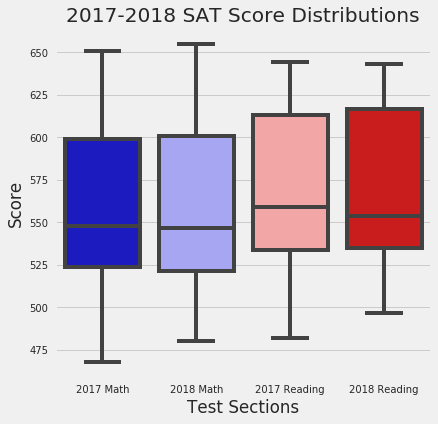

In [953]:
xtick_labels = ['2017 Math', '2018 Math', '2017 Reading', '2018 Reading']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))
plt.title("2017-2018 SAT Score Distributions")
plt.xlabel(xlabel="Test Sections")
plt.ylabel(ylabel="Score")
ax = sns.boxplot(data=combined[['sat_math_17', 'sat_math_18', 'sat_ebrw_17', 'sat_ebrw_18']], palette='seismic')
ax.set_xticklabels(xtick_labels);


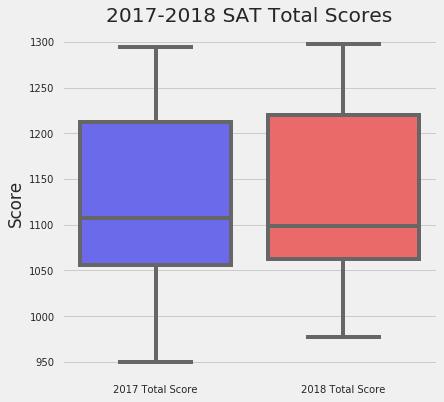

In [944]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))
plt.title("2017-2018 SAT Total Scores")
plt.ylabel(ylabel="Score")
ax = sns.boxplot(data=combined[['sat_total_17', 'sat_total_18']], palette='seismic')
ax.set_xticklabels(['2017 Total Score', '2018 Total Score']);

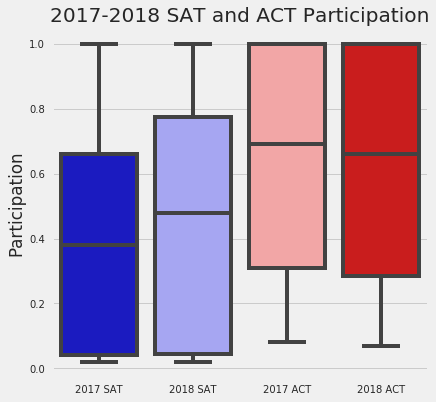

In [1007]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))
plt.title("2017-2018 SAT and ACT Participation")
plt.ylabel(ylabel="Participation")
ax = sns.boxplot(data=combined[['sat_participation_17', 'sat_participation_18', 
                                'act_participation_17', 'act_participation_18',]], palette='seismic')
ax.set_xticklabels(['2017 SAT', '2018 SAT', '2017 ACT', '2018 ACT']);


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

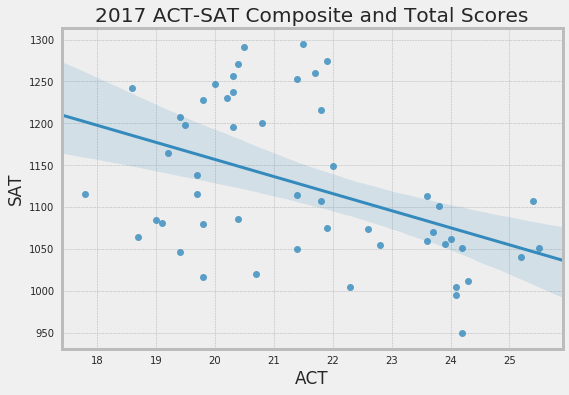

In [991]:
#Graphing the loose negative relationship between ACT and SAT Scores

plt.title("2017 ACT-SAT Composite and Total Scores")

ax = sns.regplot(combined['act_composite_17'], combined['sat_total_17'])
ax.set_xlabel("ACT")
ax.set_ylabel("SAT");

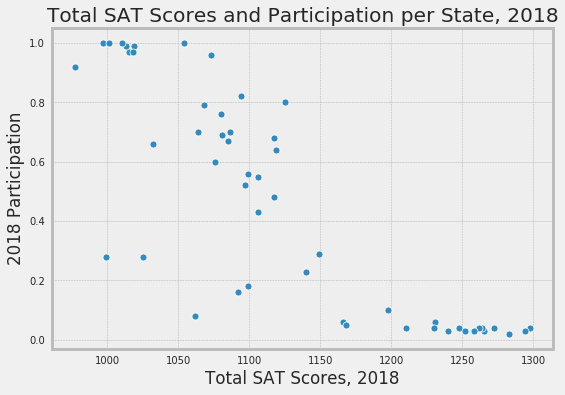

In [992]:
#Showing the strong negative correlation between SAT participation and Total Test Scores
plt.title("Total SAT Scores and Participation per State, 2018")
ax = sns.scatterplot(combined['sat_total_18'], combined['sat_participation_18'])
ax.set_xlabel("Total SAT Scores, 2018")
ax.set_ylabel("2018 Participation");

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

## Descriptive Statistics¶

**ACT Participation:** The distribution for ACT Participation in the US is biomodal and therefore not normally distributed. There is a central tendency around 60 percent participation, with a concrentation around 100 (due to state contracts), as well as a concentration around 30 percent. The spread is greater around this lower mode in 2018, possibly due to an increase in SAT participation from 2017 to 2018.

**SAT Participation:** The distribution for SAT Participation is multimodal and not normally distributed. There is a significant concentration around 5 percent (due to high ACT participation for those states), as well as sub-modes around 60% and 95% participation. The distribution has a central tendency around 40% for 2017 and 45% in 2018.

**ACT Composite Scores:** The ACT Composite scores are bimodal and non-normally distributed, with a central tendency around 21.5 out of 36 points.

**SAT Total Scores:** The SAT Total Scores are biomodal, non-normally distributed with a central tendency around 1125 points, out of a total score of 1600. There is a larger subset of scores around 1050 and another subset of scores around 1250.

**ACT Reading Score:** The ACT Reading score distribution is non-normally distributed with central tendency around 22 points.

**SAT Reading Scores:** The SAT Evidence-based Reading and Writing score distribution is non-normally distributed and has a central tendency around 570 points. There are distribution is split with submodes around 540 and 630 points.

**ACT Math Scores:** The ACT Math scores for 2017 are non-normally distributed and have a central tendency around 21 points. The data for 2018 by section is not available.

**SAT Math Scores:** The SAT Math scores are right skewed, so more of the distribution tends to lie below the mean. The distribution hasa central tendency around 560, with a slight increase from 2017 to 2018.


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

**Answer:** We do not observe a normal distribution for any of the data. This is because there is a tendency for test score to correlate negatively with participation. This tends to create biomodal distributions, where tests with high participation have lower mean scores, while those with low participation tend to have higher mean score. The lower participation-high score trend reflects some self selection bias, in which students who are seeking out that test unrequired might likely prepare for it more than students who are required to take the exam.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:** This assumption holds for somewhat for the Math and Reading scores. However, Math scores tend to have a stronger peak below the mean and are relatively uniform across the distribution, as opposed to have multiple peaks as we see with the Reading and Composite/Total Scores.

The participation distribution is biomodal-multimodal as well, and while this correlates with the test scores, the distribution is influenced by unrelated factors. Generally, states partner with either the SAT or ACT for their required standardized testing - hence, depending on their contract, the participation rates will either be approaching 100% or will be substantially lower. As of 2018, the ACT has more states under contract.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

Answer: Given that we don't have any demographic data related to test scores, it is difficult to seek relationships between the participation rates and test scores. It might be more helpful to know individual state populations, and statistics regarding if the test was mandatory vs. elective.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

**Answer:** I think it is valuable to compare the distributions. If the SAT distributions differs greatly from the ACT, it might point to differences in the difficult or accessibility of the exam to students, as the populations across states that take these exams might be relatively similar.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Illinois SAT participation percentage went from 0.9 to 0.99 in one year. Participation in the ACT dropped from 0.93 to 0.43. This was a controversial news event
https://www.chicagotribune.com/news/local/breaking/ct-iillinois-act-exam-met-20170414-story.html


Rhode Island, 0.71-0.97 SAT


***2017 ACT Contracted States:**
Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, 
North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

**2018 ACT Contracted States:**
Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

Focus on states in the middle with no contract requirements
https://www.applerouth.com/blog/2016/01/13/how-the-sat-got-its-groove-back/
States w/o contract:


Iowa - Low SAT participation, moderate ACT participation
South Dakota - declining SAT 2017-2018
Kansas - moderate
New Mexico
West Virginia
Arizona, Alaska, Oregon, California, Vermont, Texas, Indiana, Wash, Virgina, Maryland

## Conclusions and Recommendations

## State of Choice: **Pennsylvania**

- **New SAT Contracts:** Florida, Illinois, New Jersey, Rhode Island
- **East Coast SAT Contracts:** Connecticut, Delaware, District of Columbia, Maine, New Hampshire, New Jersery, Rhode Island

I chose Pennsylvania as my target state because it is one of those "middle" states, in that it does not have a contract with either the SAT or ACT, thus making it the perfect target candidate. Pennsylvania borders New York State, which has also shown an increase in [SAT testing.](https://www.applerouth.com/blog/2016/01/13/how-the-sat-got-its-groove-back/). Pennsylvania is also regionally connected to many other states that have inked contracts with the college board (see **East Coast SAT Contracts** above).

Likewise, Pennsylvania has a significantly large population, ranked [5th Nationally](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population#State_rankings). Contracting with Pennsylvania would result in considerable profits.

Between 2017 and 2018, Pennsylvania saw a slight jump in participation rate, from 65 to 70 percent, and ACT participation dipped marginally. However, with this jump in SAT participation, the average scores also increased by 15 points, counter to typically observed pattern. This is evidence that Pennsylvania students are seeking out the SAT over ACT - a pattern that we could leverage to the Pennsylvania Department of Education.
